In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Variable Identification

we have to predict whether the pasenger is survived or not so our targer(output) variables will be "Survived"

and remaining olumns will be predictora(Input variable)

In [5]:
y = target =labels = output_var = dataset["Survived"]
X = predictors = input_var = dataset.loc[:,dataset.columns!='Survived']    

In [6]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
#  X.head()

dataset = dataset.set_index('PassengerId')

# Univariate Analysis

1.we explore variable one by one
2.Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

# Continuous variable Analysis

* Measue of central tendency(Mean,Median,Mode) of the variable.
* Measure of spread(Range,IQR,Variance,Standard Deviation) of the variable
* measure of Shape(Symmetrical Distribution eg.Normal Distribution, Asymmetrical Distribution (left or Right Skewed Distribution). Kurtosis(shape of the of the distribution in terms of height or flatness)


# Categorical Variable Analysis

* For categorical variables, we will use frequency distribution of each category e.g Bar Chart, Pie Chart

In [8]:
#Run descriptive statistics of numerical datatypes
dataset.describe(include = ['float64','int64'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dataset.head(3) 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
dataset.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [11]:
#lets Analysis the Target Variable "Survived"
#Calculate the percentage of People who Survived and Not Survived

dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
per_sur_nonsur = (dataset['Survived'].value_counts()/dataset.shape[0]*100).round(2)

per_sur_nonsur

0    61.62
1    38.38
Name: Survived, dtype: float64

# A count plot can be thought of as a histogram across a cateorical, instead of quantitative variablee

<AxesSubplot:xlabel='Survived', ylabel='count'>

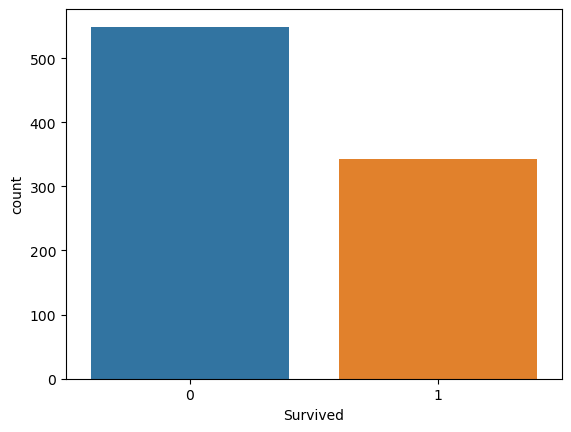

In [13]:
#lets plot the graph who are survived and not survived as per the column data
sns.countplot(data=dataset,x='Survived')

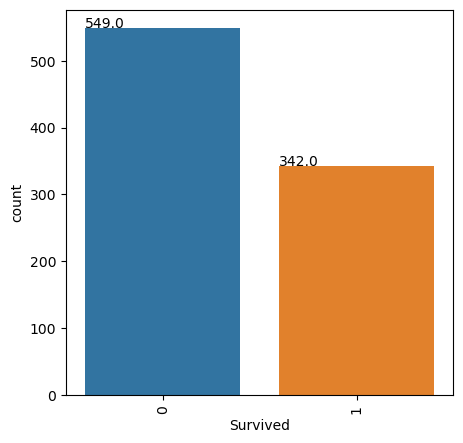

In [14]:
#### #Lets Display Count on top of countplot
    
fig, ax2 = plt.subplots(figsize =(5,5))
graph = sns.countplot(ax=ax2,x='Survived',data = dataset)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x(),height +0.3,height,ha="left")

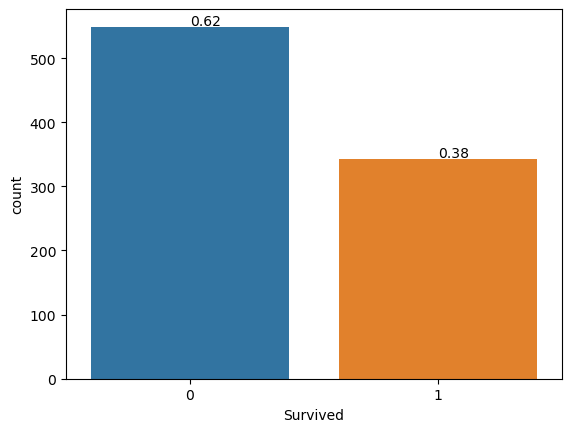

In [15]:
#If we want to display the percentage
from matplotlib.pyplot import show
titanic = dataset
total = float(len(titanic))#one person per row
#ax = sns.barplot(x='clas',hue ="who",data ='titanic')
ax = sns.countplot(x="Survived",data = titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,'{:1.2f}'.format(height/total))  

<AxesSubplot:xlabel='Age', ylabel='Count'>

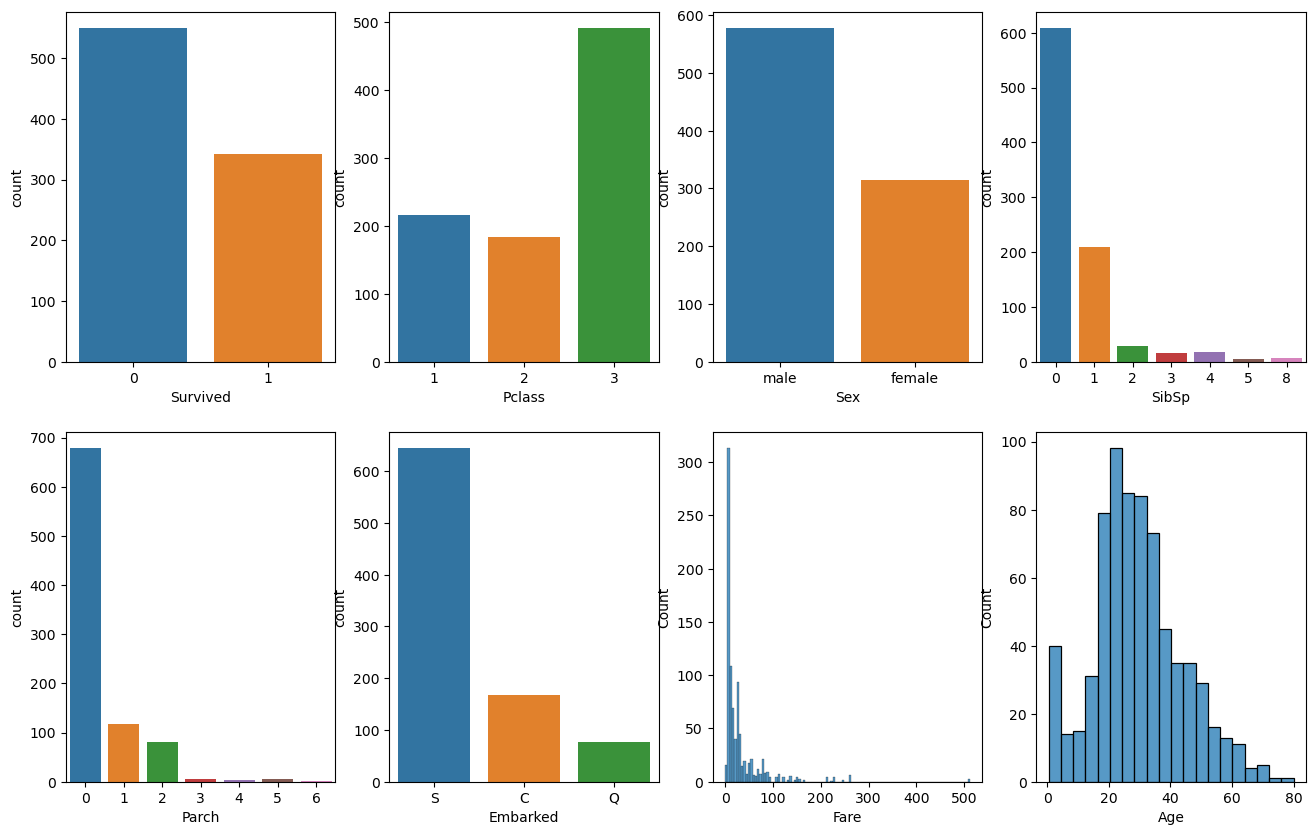

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # supress future warning
# Combined univariate analysis of each variables
fig,axes = plt.subplots(2,4, figsize=(16,10))
sns.countplot(x='Survived',data=dataset,ax=axes[0,0])
sns.countplot(x='Pclass',data=dataset,ax=axes[0,1])
sns.countplot(x='Sex',data=dataset,ax=axes[0,2])
sns.countplot(x='SibSp',data=dataset,ax=axes[0,3])
sns.countplot(x='Parch',data=dataset,ax=axes[1,0])
sns.countplot(x='Embarked',data=dataset,ax=axes[1,1])
# sns.distplot(dataset['Fare'], kde=True,ax=axes[1,2])
sns.histplot(data=dataset,x="Fare",ax=axes[1,2])
sns.histplot(data=dataset,x="Age",ax=axes[1,3] )

# Bivariate Analysis

We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables.
The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.
Different methods are used to tackle these combinations during analysis process.

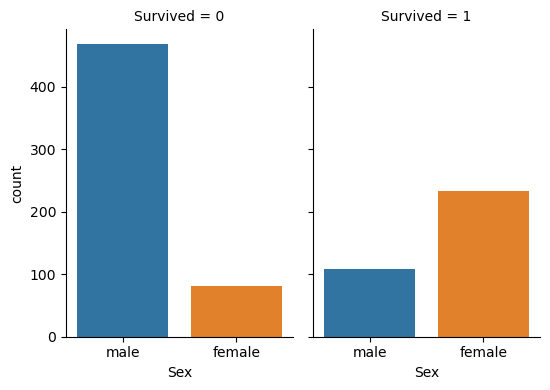

In [17]:
sns.catplot(x="Sex",col="Survived",data=dataset, kind="count",height=4, aspect=.7)

We can clearly see that male survial rates is around 19% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

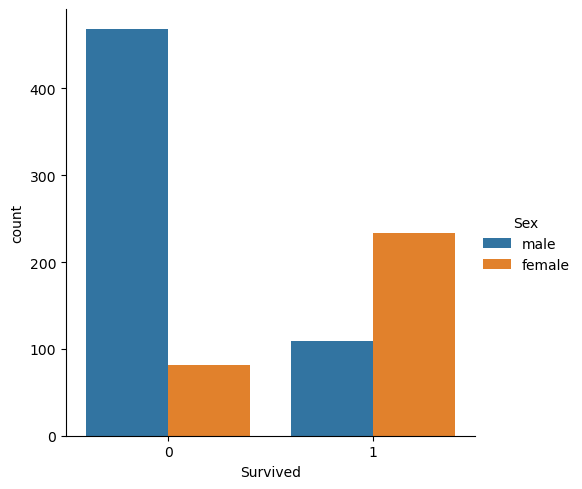

In [18]:
sns.catplot(x='Survived',hue="Sex",data=dataset,kind = "count")


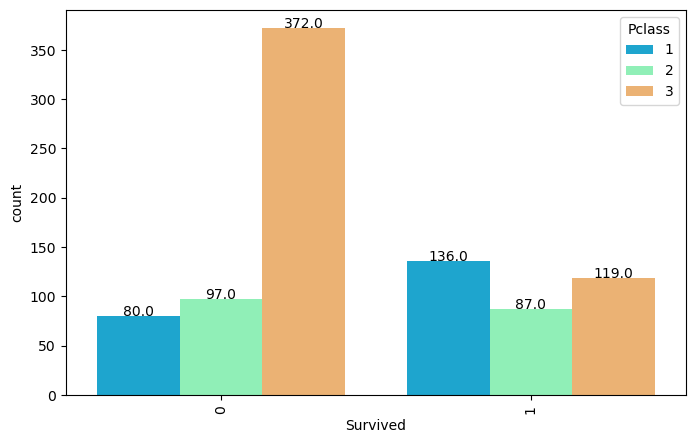

In [19]:
 # Lets more elaborate survived data with Pclass
#sns.countplot(data=df_train,x = "Survived",hue="Pclass",palette="rainbow")
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(ax=ax1,data=dataset,x = "Survived",hue="Pclass",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

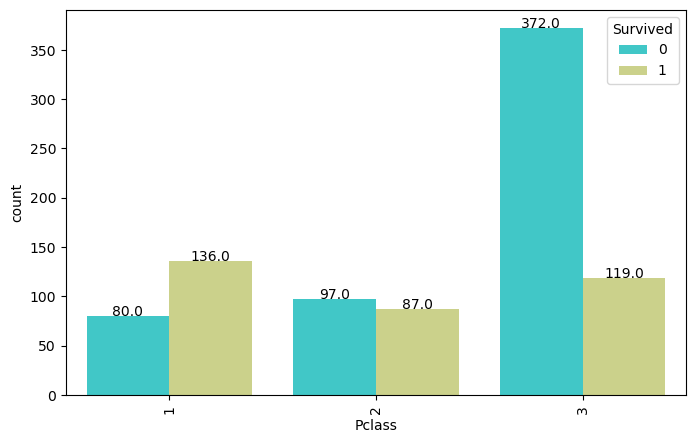

In [20]:
# Lets more elaborate survived data with Pclass and we will use countplot
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(ax=ax1,data=dataset,x = "Pclass",hue="Survived",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

There is also a clear relationship between Pclass and the survival by referring to above plot. Passengers on Pclass1 has a better survial rate of approx 62% whereas passengers on pclass3 had the worst survial rate of approx 25%

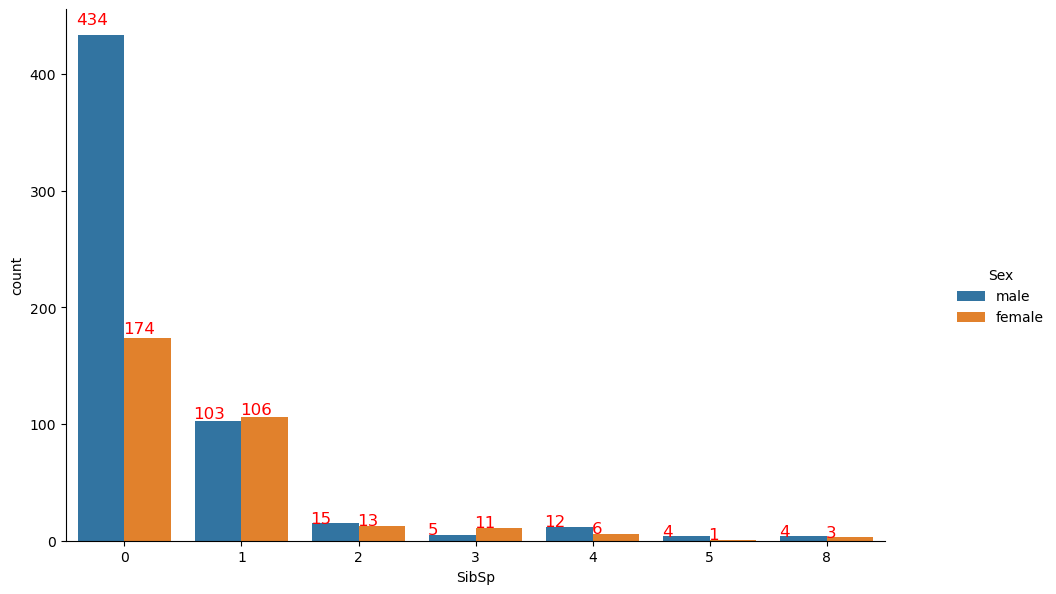

In [21]:
##display Sibling with sex data
#sns.catplot(data=df_train,x="SibSp",hue = "Sex", kind = "count",height=4)
g = sns.catplot(data=dataset,x="SibSp",hue = "Sex", kind = "count",height=4,legend=True)
g.fig.set_size_inches(12,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),
            color='red', 
            rotation='horizontal', 
            size='large')

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

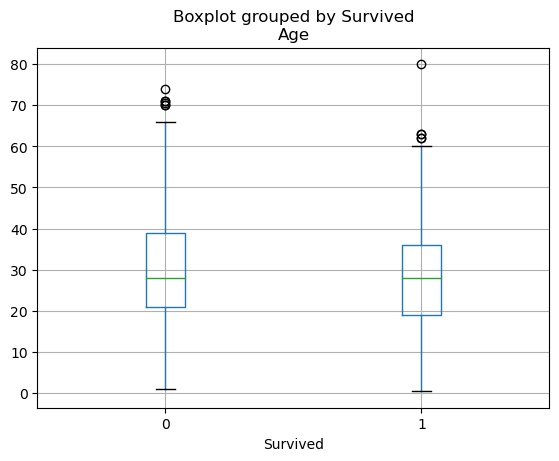

In [22]:
## Lets analyse survided corresponding to Age 
dataset.boxplot(column="Age",by="Survived")

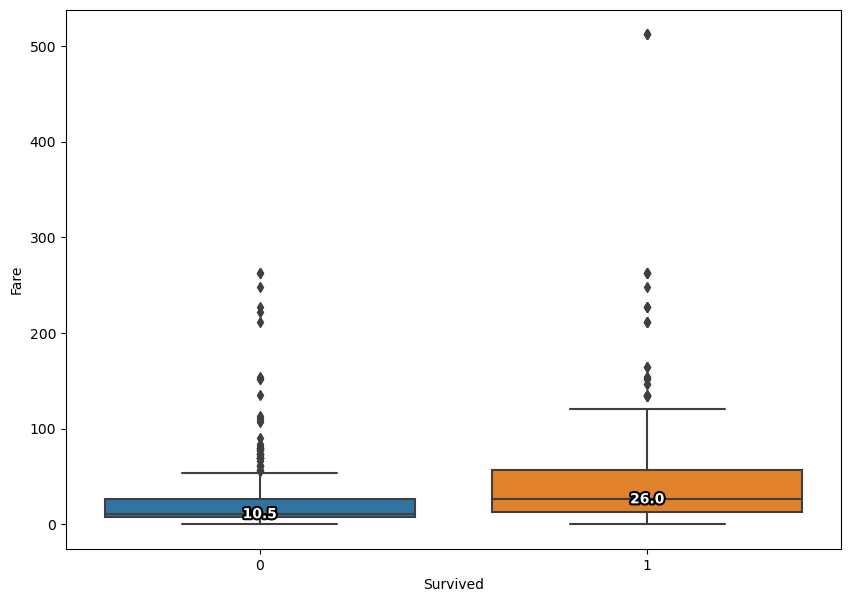

In [23]:
# Plotting a boxplot between 'Survived' and 'Fare' Columns
import matplotlib.patheffects as path_effects

fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips =  dataset
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Survived', y='Fare', 
                           #hue='Sex', 
                           data=dataset,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

There is also a marginal relationship between the fare and survial rate

# Continous Variable vs Continous Variable

<AxesSubplot:xlabel='Age', ylabel='Fare'>

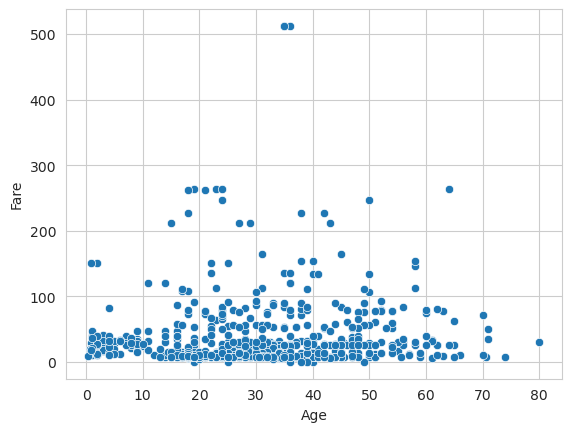

In [24]:
## Plot Fare Distribution Across Age usinf scatter plot
sns.scatterplot(x = dataset["Age"],y = dataset["Fare"])

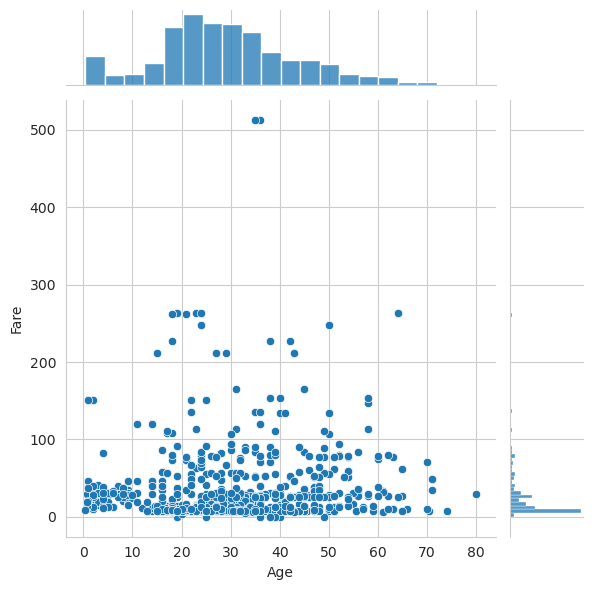

In [25]:
## Plot Fare Distribution Across Age usinf Joint plot
sns.jointplot(x="Age",y="Fare",data=dataset)

# Multivariate Analysis

We perform multivariate analysis with more than 2 variables for any combination of categorical and continuous variables.
The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.
Different methods are used to tackle these combinations during analysis process.

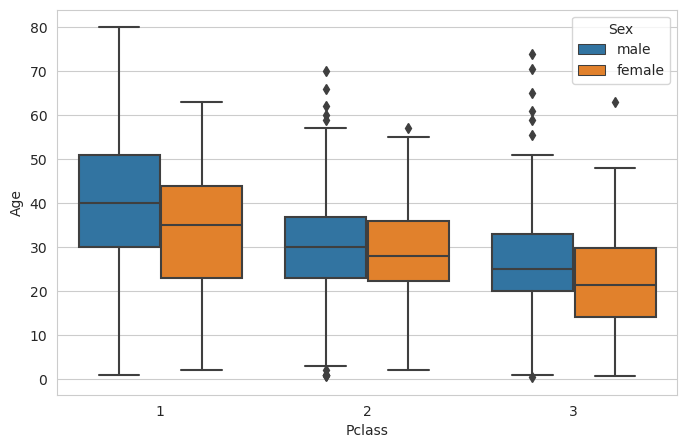

In [26]:
fig, ax1 = plt.subplots(figsize=(8,5))
testPlot = sns.boxplot(ax=ax1, x='Pclass', y='Age', hue='Sex', data=dataset)

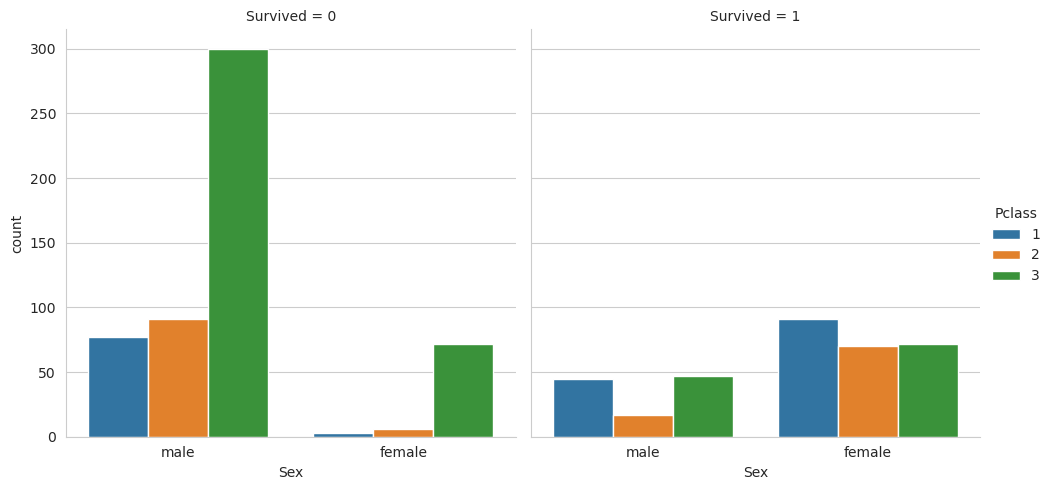

In [27]:
# Lets more elaborate survived data with Pclass and sex and we will use catplot
sns.catplot(data=dataset,col = "Survived",x = "Sex", hue="Pclass",kind = "count")

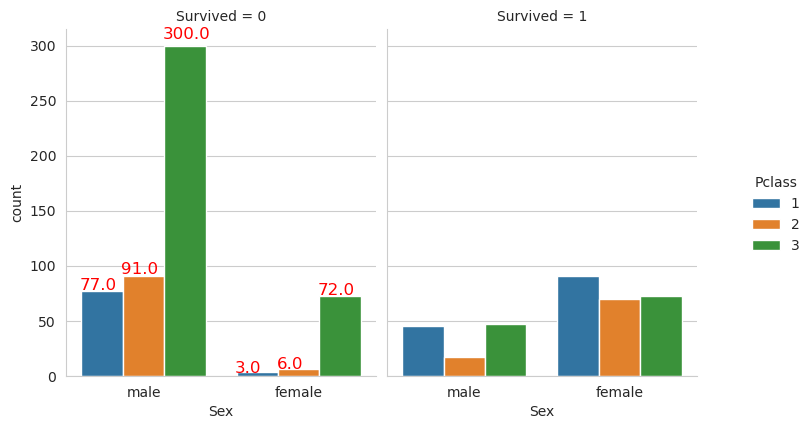

In [28]:
g = sns.catplot(data=dataset,col = "Survived",x = "Sex", hue="Pclass",kind = "count",legend=True)
g.fig.set_size_inches(8,5)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}'.format(p.get_height()),
            color='red', 
            rotation='horizontal', 
            size='large')

<AxesSubplot:>

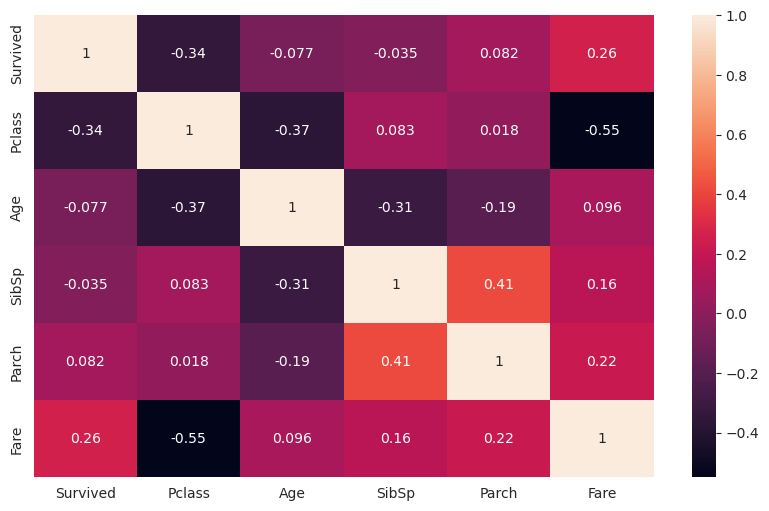

In [29]:
## Co-relation matrix
fig,ax = plt.subplots(figsize = (10,6))
corr = dataset.corr()
sns.heatmap(corr,annot=True)

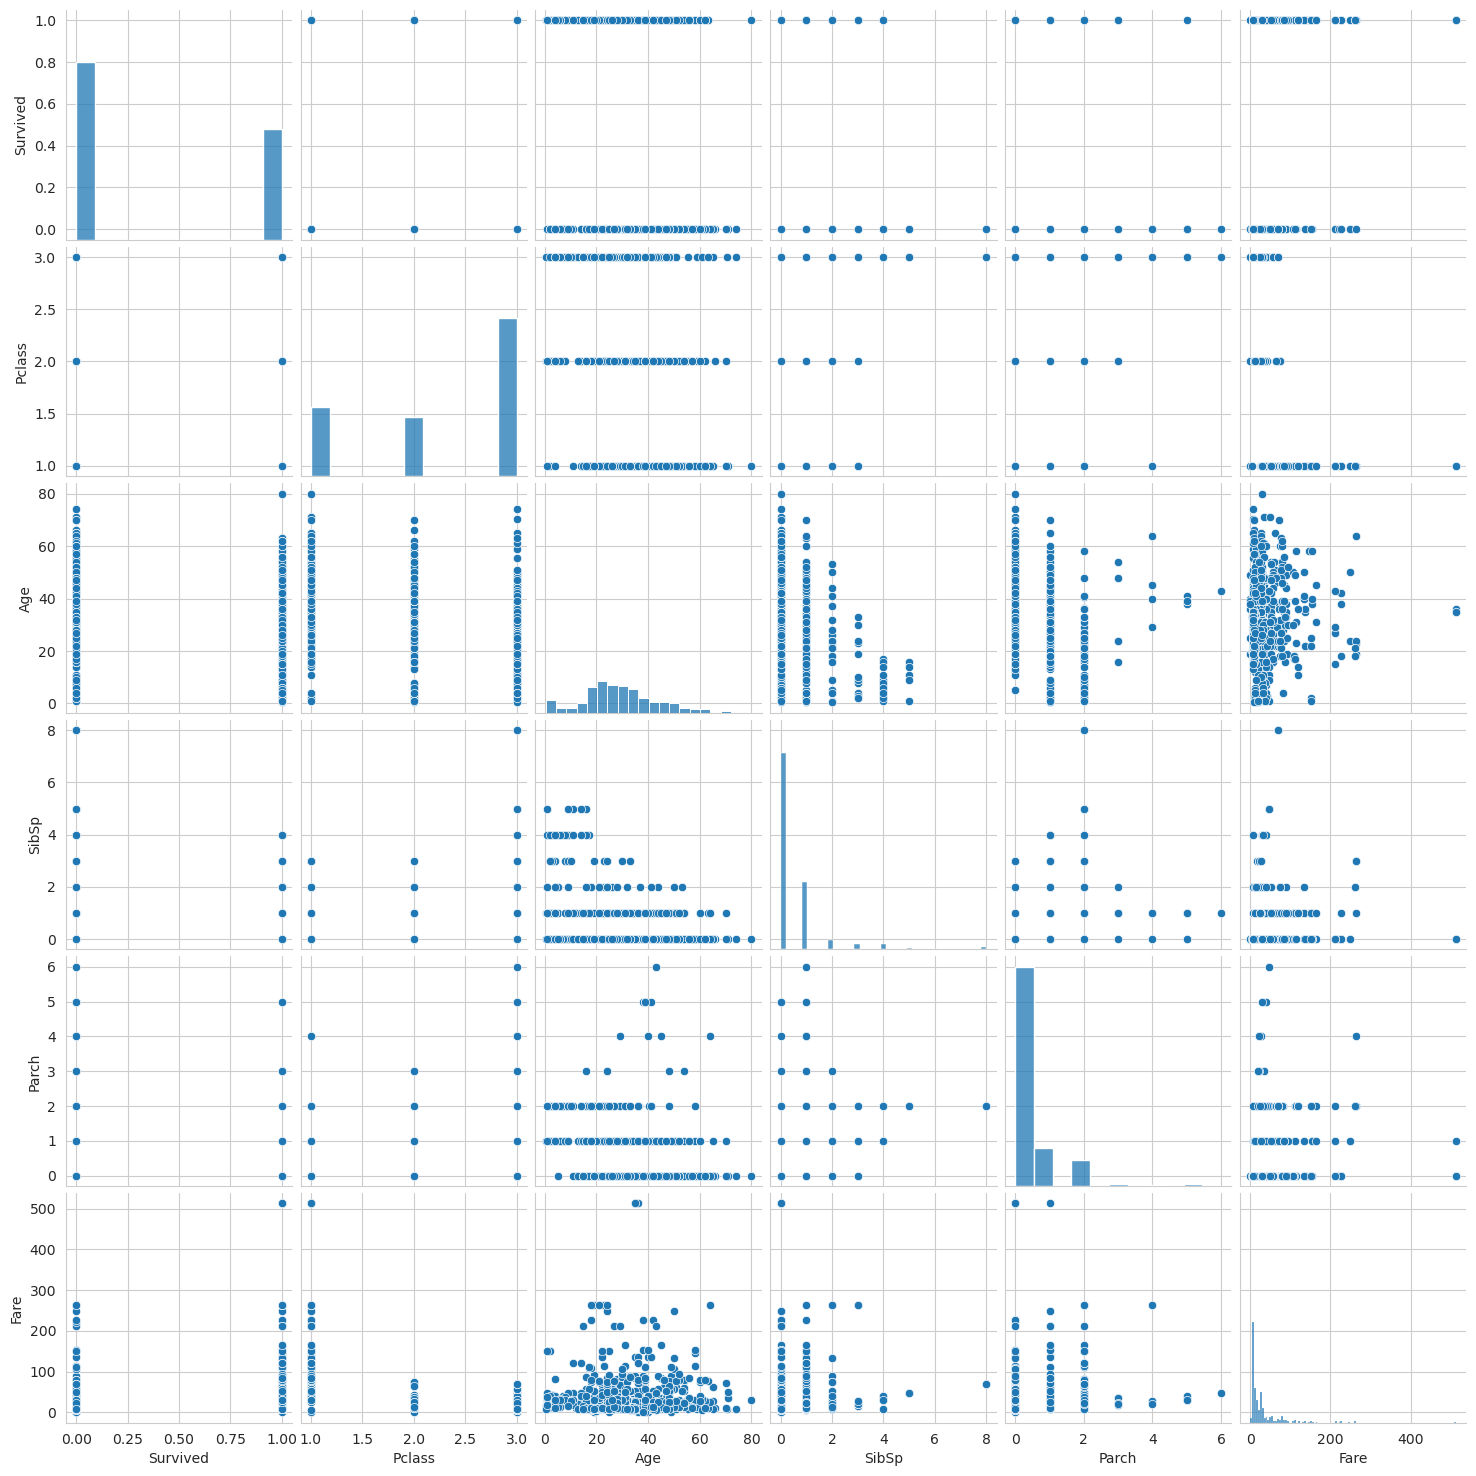

In [30]:
sns.pairplot(dataset)

# Data Cleaning

1. Handling Dulicate Data

In [31]:
# If you use the method sum() along with it, then it will return the total number of the duplicates in the dataset
dataset.duplicated().sum()

0


# 2. Handling missing value (Categorical Data and Numerical Data)

<AxesSubplot:ylabel='PassengerId'>

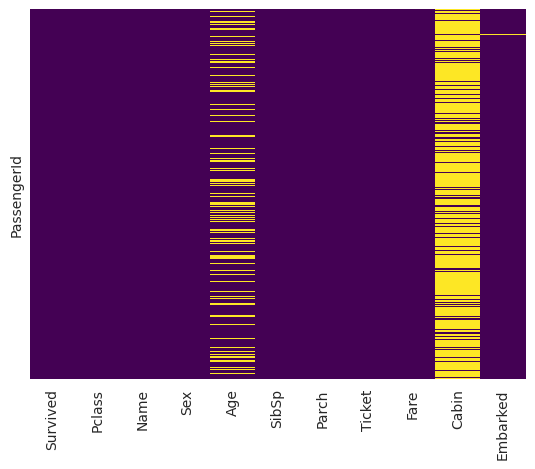

In [32]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False, cmap="viridis")
# From the below graph it is cleary visible that most of the null values are av

In [33]:
# lets find out the percentage of misssing vale in each column
percent_missing =  dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
Cabin,Cabin,77.104377


As we see from above that AGE data is only mising around 20% and we have to find that can we replace these Nan value with some other value . So we need to find how can we replace these?.



In [34]:
# Now we will drop these missing value
df_train1= dataset.dropna(subset=["Age","Embarked"],axis=0).copy()

In [35]:
df_train1.shape


(712, 11)

In [36]:
percent_missing = df_train1.isnull().sum() * 100 / len(df_train1)
missing_value_df1 = pd.DataFrame({'column_name': df_train1.columns,
                                 'percent_missing': percent_missing})
missing_value_df1

,column_name,percent_missing
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
Cabin,Cabin,74.297753


In [37]:
df_train1.drop("Cabin",axis=1,inplace=True)

In [38]:
df_train1.head(2)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [39]:
percent_missing = df_train1.isnull().sum() * 100 / len(df_train1)
missing_value_df1 = pd.DataFrame({'column_name': df_train1.columns,
                                 'percent_missing': percent_missing})
missing_value_df1

,column_name,percent_missing
Survived,Survived,0.0
Pclass,Pclass,0.0
Name,Name,0.0
Sex,Sex,0.0
Age,Age,0.0
SibSp,SibSp,0.0
Parch,Parch,0.0
Ticket,Ticket,0.0
Fare,Fare,0.0
Embarked,Embarked,0.0


# 3. Handling Outliers

In [40]:
df_train1["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Fare'>

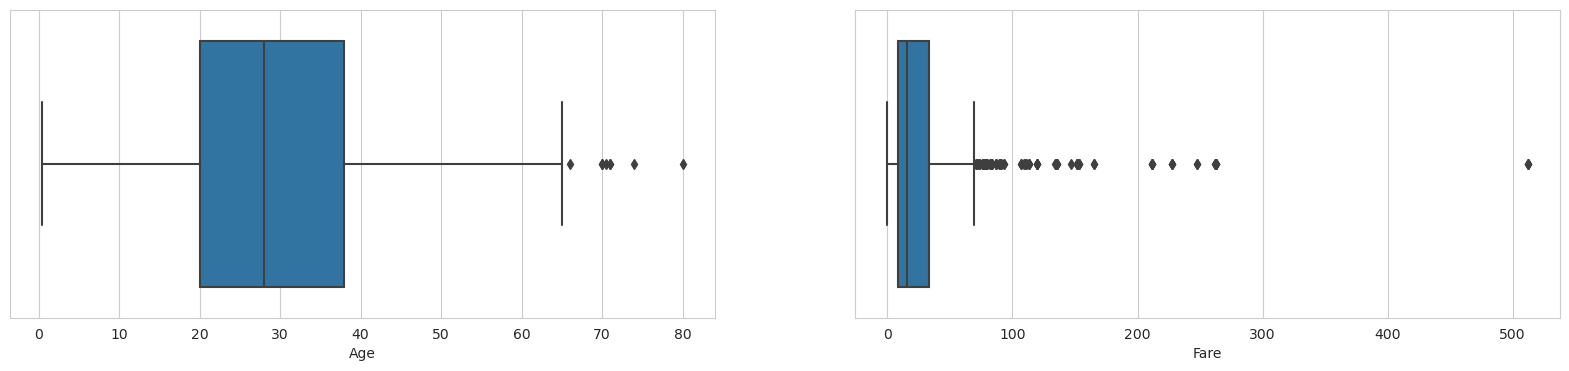

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize = (20,4))
sns.boxplot(x="Age",data=df_train1,ax=ax1)
sns.boxplot(x="Fare",data=df_train1,ax=ax2)

upper_limit :  73.12089139759976
lower_limit :  -13.836706004341348
Mean Value :  29.64209269662921
Median Value :  28.0
1st Standard Deviation :  14.49293290032352


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


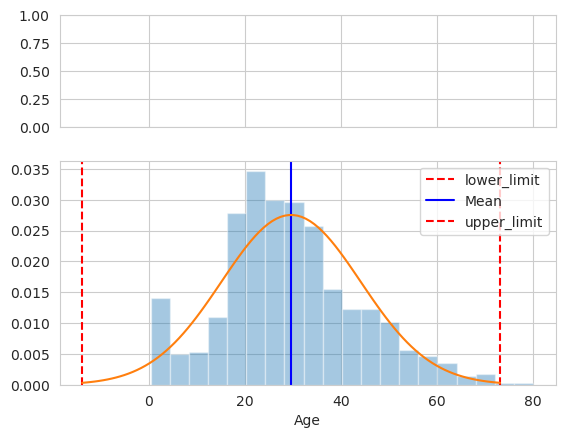

In [42]:
from scipy.stats import norm
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

median=df_train1.Age.median()
mean=df_train1.Age.mean()
std = df_train1.Age.std()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

# sns.boxplot(df_train1["Age"], ax=ax_box)
# ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(df_train1["Age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [43]:
df_train1_Age_outlier = df_train1[(df_train1.Age>upper_limit) | (df_train1.Age<lower_limit)]
df_train1_Age_outlier

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,S


In [44]:
#assigning nan to the outliers
df_train1['Age'].values[df_train1['Age'] > upper_limit] = np.nan
df_train1['Age'].values[df_train1['Age'] < lower_limit] = np.nan

In [45]:
df_train1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         2
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [46]:
#imputing nan values with mean value
#df_train1['Age']=df_train1.Age.fillna(df_train1.Age.mean())
# As we are preparing our base model and outlier values are also very few so we will delete these outlier values
df_train1.dropna(inplace=True)

In [47]:
df_train1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [48]:
df_train1.shape

(710, 10)